# Image classification Multi class

In [1]:
from sklearn.datasets import load_digits
import pandas as pd
import matplotlib.pyplot as plt

## Loading the data

In [93]:
# load the dataset
data=load_digits()

In [3]:
# store as a datframe
df = pd.DataFrame(data.data)

In [4]:
# add target variable
df['target'] = data.target
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0,5
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0,6
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0,7
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0,8
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0,9


In [5]:
df.shape

(1797, 65)

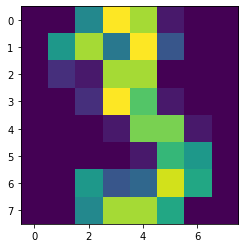

In [6]:
# view data as image
plt.imshow(data.images[3])

In [7]:
# classify the images b/w 0-9
# create train and test data sets
# build the model
# evaluate the model

In [8]:
from PIL import Image

In [9]:
im=data.images[0]
im=im.astype('uint8')
im=Image.fromarray(im).resize((256,256))

In [36]:
# Genarate data folder wise
for x in range(len(data.images)):
    im=data.images[x]
    im=im.astype('uint8')
    im=Image.fromarray(im).resize((256,256))
    for n in range(0,10):
        if str(df.target[x])==str(n):
            plt.imsave(f"D:\\numbers\\train\{n}\\"+str(df.target[x])+str(x)+'.jpg',im)

In [37]:
# Split the data 20% to validation
import os
for y in range(0,10):
    datafiles = f'D:\\numbers\\train\{y}'
    move = os.listdir(datafiles)[:round((len(os.listdir(datafiles))*30)/100)]
    for f in move:
        os.rename(f'D:\\numbers\\train\{y}\\' + f, f'D:\\numbers\\validation\{y}\\' + f)
    print(len(os.listdir(datafiles)), len(os.listdir(f'D:\\numbers\\validation\{y}\\')))


125 53
127 55
124 53
128 55
127 54
127 55
127 54
125 54
122 52
126 54


<!-- # # Delete data & validation 
# import os
# for y in range(0,10):
#     datafiles = f'D:\\numbers\\train\{y}'
#     validation = f'D:\\numbers\\validation\{y}'
    
#     print(len(os.listdir(datafiles)), len(os.listdir(validation)), " will be deleted")
    
#     for f in os.listdir(datafiles):
#         os.remove(os.path.join(datafiles, f))
        
#     for f in os.listdir(validation):
#         os.remove(os.path.join(validation, f)) -->
    

# Image classification Multi class

In [38]:
# import libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam  #controls lr

In [39]:
# image augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [40]:
# image prediction
from tensorflow.keras.preprocessing import image

In [41]:
#general
import numpy as np
import os
import pandas as pd
from sklearn.metrics import classification_report

# network building

In [78]:
# intialise the bit depth
# for color imgs it is 3 for monochrome it is 1
bitdepth = 3
size = 64 #same for both height and width
#incase if diff sizes are req create width nd height with diff values
actualclasses = [0,1,2,3,4,5,6,7,8,9]
outputnodes = len(actualclasses)

In [98]:
# intialise the model
classifier = Sequential()

# convolution layer
classifier.add(Convolution2D(64,kernel_size=(2,2),input_shape=(size,size,bitdepth),activation='relu')) #c1
classifier.add(Convolution2D(32,kernel_size=(2,2),activation='relu')) #c2

# max pooling layer
classifier.add(MaxPooling2D(pool_size=(2,2)))

# #layer set 2
classifier.add(Convolution2D(32,kernel_size=(3,3),activation='relu')) #c2
classifier.add(MaxPooling2D(pool_size=(3,3)))

# #layer set 3
# classifier.add(Convolution2D(32,kernel_size=(3,3),activation='relu')) #c3
# classifier.add(MaxPooling2D(pool_size=(3,3)))

# flatten layer
classifier.add(Flatten())

# fully connected layer
classifier.add(Dense(units=20,activation='relu')) #HL1
#classifier.add(Dropout(rate=0.1)) #dropout layer1

classifier.add(Dense(units=20,activation='relu')) #HL2
#classifier.add(Dropout(rate=0.1)) #dropout layer2

classifier.add(Dense(units=20,activation='relu')) #HL3
#classifier.add(Dropout(rate=0.1)) #dropout layer3

classifier.add(Dense(units=outputnodes,activation='softmax')) #output layer

In [99]:
# compile the model
classifier.compile(optimizer=Adam(learning_rate=0.005),loss='categorical_crossentropy',metrics=['accuracy'])

# Image processing and Augmentation

In [81]:
# apply image augmentation on train data
train_datagen = ImageDataGenerator(rescale=1/255,channel_shift_range=0.5,width_shift_range=0.5, 
                                  height_shift_range=0.5, horizontal_flip=True)

In [82]:
# apply image augmentation on validation data
val_datagen = ImageDataGenerator(rescale=1/255,channel_shift_range=0.5,width_shift_range=0.5, 
                                  height_shift_range=0.5, horizontal_flip=True)

In [83]:
# set up the training and validation directories to read the image files
train_dir =r"D:\numbers\train"
val_dir=r"D:\numbers\validation"

In [84]:
batchsize=1
colormode='rgb'   #default is rgb
targetsize=(size,size)
classmode ='categorical' #default value is categorical

In [85]:
# read the files(train)
train_set = train_datagen.flow_from_directory(train_dir,target_size=targetsize,
                                    class_mode=classmode,batch_size=batchsize,color_mode=colormode)

Found 1258 images belonging to 10 classes.


In [86]:
# read the files(validation)
val_set = val_datagen.flow_from_directory(val_dir,target_size=targetsize,
                                    class_mode=classmode,batch_size=batchsize,color_mode=colormode)

Found 539 images belonging to 10 classes.


In [87]:
# store the train and validation counts
train_count = train_set.n
val_count = val_set.n
print('Train count = {}, Validation count = {}'.format(train_count,val_count))

Train count = 1258, Validation count = 539


# Fit the Model

In [102]:
epoch=10

In [103]:
classifier.fit(train_set,steps_per_epoch=train_count,epochs=epoch,
              validation_data = val_set,validation_steps = val_count)

Epoch 1/10
1258/1258 [==============================] - 9s 7ms/step - loss: 2.3091 - accuracy: 0.0882 - val_loss: 2.3026 - val_accuracy: 0.1020
Epoch 2/10
1258/1258 [==============================] - 9s 7ms/step - loss: 2.3081 - accuracy: 0.0906 - val_loss: 2.3037 - val_accuracy: 0.1020
Epoch 3/10
1258/1258 [==============================] - 9s 7ms/step - loss: 2.3075 - accuracy: 0.1017 - val_loss: 2.3031 - val_accuracy: 0.1020
Epoch 4/10
1258/1258 [==============================] - 10s 8ms/step - loss: 2.3085 - accuracy: 0.0962 - val_loss: 2.3028 - val_accuracy: 0.1020
Epoch 5/10
1258/1258 [==============================] - 11s 9ms/step - loss: 2.3072 - accuracy: 0.0882 - val_loss: 2.3032 - val_accuracy: 0.1020
Epoch 6/10
1258/1258 [==============================] - 10s 8ms/step - loss: 2.3079 - accuracy: 0.0882 - val_loss: 2.3036 - val_accuracy: 0.1002
Epoch 7/10
1258/1258 [==============================] - 10s 8ms/step - loss: 2.3087 - accuracy: 0.0946 - val_loss: 2.3031 - val_accur

In [110]:
# specify the test path
test_path=r"D:\numbers\test/"

In [111]:
# list is to store the filenames of the test data
test_images=[]

In [112]:
for _,_,files in os.walk(test_path):
    for f in files:
        test_images.append(test_path + f)
#print(test_images)
len(test_images)

1

In [113]:
# stack the images in numpy array format
image_stack= None
for i in test_images:
    img=image.load_img(i,target_size=(size,size),color_mode=colormode)
    
    #converting the individual image into array
    y=image.img_to_array(img)
    y=np.expand_dims(y,axis=0)
    
    #convert the image as in scale data
    y/=255
    
    #stack every transformed image
    if image_stack is None:
        image_stack=y
    else:
        image_stack=np.vstack([image_stack,y])

In [114]:
len(image_stack)

1

In [115]:
predictions = np.argmax(classifier.predict(image_stack),-1)
print(predictions)

[6]
